### Introduction to clustering

Process of organizing objects into groups whose members are similar in some way.\
Often unsupervised.\
The process of grouping data is known as <strong>clustering</strong>

first order stats: mean,\
second order stats: covariance.\
<i>Need new way to classify</i>

### Numbering the clusters

Main issue with clustering is figuring out a number of clusters\
Domain knowledge generally used to determine the number of clusters in a dataset

### Similarity Measures


Minkowkski Metric
$
L_p(x,y) = (\sum_{i=1}^d|x_i-y_i|^p)^{\frac{1}{p}} \\ 
$
also referred to as the L<sub>2</sub> norm

### Taxonomy of clustering methods

Hoerarchial:<ul>
    <li>Agglomerative</li>
    <li>Divisive</li>
</ul>

Dendro gram: a graphical scale of similarity in a tree like structure\
SciPy reference <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html">here</a>
    
<i>Agglomerative</i> Methods start eith each example in its own cluster and iteratively combine them to form larger and larger clusters\
<i>Divisive</i> Separates all examples immediately into clusters

#### Hierarchial Agglomerative Clustering

Assumes similarity function for determining the similarity of two instances.\
Starts with all instances in separate clusters, joins two clusters that are most similar until one remains.\
Forms a binary tree\

Computing similarity of two clusters:<ul>
    <li>Single link: Similarity of two most similar members</li>
    <li>Complete Link: Similarity of two least similar members</li>
    <li>Group Average</li>
    <li>Mean</li>
</ul>

Popularity distance measures

$
   d_{min}(D_i,D_j) = min |x-x^a|\\
   d_{max}(D_i,D_j) = max |x-x^a|\\
   d_{avg}(D_i,D_j) = \frac{1}{\text{#}D_i \text{#}D_j}\sum_{x \in D_i}\sum_{x^a \in D_j}||x - x^a||\\
   d_{mean}(D_i,D_j) = ||m_i - m_j||
$

### Linkage function in SciPy

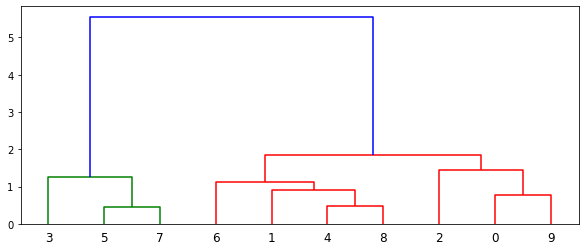

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

X,y = datasets.make_blobs(n_samples=10, n_features=2, random_state=5)
from scipy.spatial import distance
Y = distance.pdist(X, 'euclidean')
from scipy.cluster.hierarchy import dendrogram, linkage
z = linkage(Y, 'single')
fig = plt.figure(figsize=(10,4))
dn = dendrogram(z)
plt.show()

### Optimal Hierarchical Clustering

Sum of squares for clustering formula

$
   SSE = \sum_{i=1}^K\sum_{x \in C_i}||m_i - x||^2
$

where m<sub>i</sub> is the i-th cluster with n data items defined by:

$
   m_i = \frac{1}{n_i}\sum_{x \in C_i}x
$

#### Lifetime Method

The <i>lifetime</i> of a cluster is defined as an absolute value of the difference between the dendrofram level at which it is created and the level at which it is absorbed into a larger cluster. Using lifetime as a criterion, a user can search for clusters that have a large lifetime.

#### Self similarity measure method

Uses a function h(C) that measures the dissimilarity between the vectors of the same cluster C.

### Feature aggregation using agglomerative clustering

Used for dimensionality reduction as well. construct d by d correlation matrix instead of n by n distane matrix.\
The result is a set of new features fewer in number

### K-means clustering

Assume number of cluster is given. Ranomly initialize all centers\
Select an example and assign it to a cluster whose center is closest. Repeat for all\
Update the cluster centers with the new mean of all their data points\
Assign and perfom updates until all cluster centers are stabilized (stop updating).

Results vary based on random initialization or seed selection\
Some result in poor convergence, or sub optimal clustering\
Seeds should be chosed via some heuristic.

### Selecting Seed Points

Combines HAC and K-means clustering for decision\
First randomly take a sample of instances of size $\sqrt{n}$\
Run group-average HAC on this sample which takes O(n) time.\
Use the results of HAC as initial seeds for k-means\
Overall algorithm is O(n) and avoids problems with bad seed selection

Alternative method is to sample some random data and perform k-means, save better of multiple batches.

#### Indirect Clustering through Iterative Optimization

This approach works best when an intial clustering solution can be obtained through other means\
SSE criterion. other measures are possible with suitable changes in algorigthm.\
Used for fine tuning a rough solution.

### Validating clusters

Run algorithm with different parameter settings and observe performance metric changes\
See how compace the clusters are using a suitable metric\
Validate against a hypothesis based on domain knowledge\
Use ground truth if possible to validate results.

#### Silhouette Coefficient

Defined for each sample with two scores:\
a: Mean distance between a sample and all other points in the same class\
b: Mean distance between a sample and all other points in the next nearest cluster\
$
s = \frac{b-a}{max(a,b)}
$

#### Random index

Compare with ground truth and your clustering results\
Works by looking at all unordered pairs of examples.\
Some pairs are together in the clustering result as well as ground truth, some will not be.\
RI = count of pairs always in agreement or disagreement / total number of pairs\
RI will never exceed 1 and can never be lower than 0.